## 0. Install and Import Dependencies

In [6]:
# !pip install easyocr
# !pip install imutils



In [2]:
import os
os.getcwd()

'C:\\Users\\sparm\\Ml\\ANPRwithPython-main\\ANPRwithPython-main'

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [8]:
import pytesseract

In [9]:
pytesseract.pytesseract.tesseract_cmd="C:/Program Files (x86)/Tesseract-OCR/tesseract.exe"

## 1. Read in Image, Grayscale and Blur

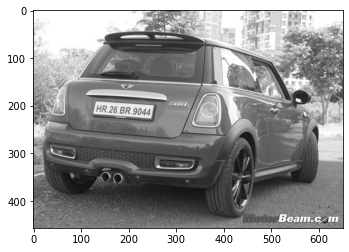

In [10]:
img = cv2.imread('image1.jpg')#a3
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

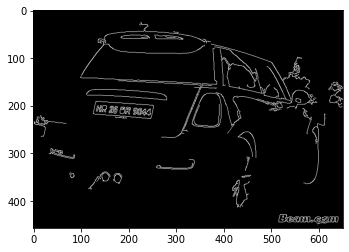

In [11]:
bfilter = cv2.bilateralFilter(gray, 15, 75, 75) #Noise reduction
edged = cv2.Canny(bfilter, 30, 300) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [12]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]

In [13]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 5, True)
    if len(approx) == 4:
        location = approx
        break

In [14]:
location

array([[[126, 217]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [15]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

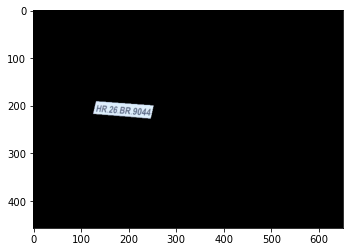

In [16]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [17]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
# bfilter1 = cv2.bilateralFilter(cropped_image, 9, 75, 75)
# edg = cv2.Canny(bfilter1, 60, 120)

'C:\\Users\\sparm\\Ml\\ANPRwithPython-main\\ANPRwithPython-main'

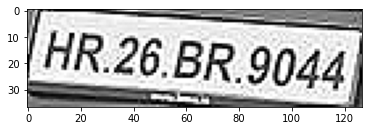

In [18]:
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 5.0, -1.0],
                   [0.0, -1.0, 0.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_rst = cv2.filter2D(cropped_image,-1,kernel)#,-1,kernel
# plt.imshow(cropped_image)
orr=cv2.cvtColor(img_rst, cv2.COLOR_BGR2RGB)
plt.imshow(orr)
# cv2.imwrite("output1.png",orr)
import os
os.getcwd()


##  Easy OCR To Read Text

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'HR.26.BR.9044'

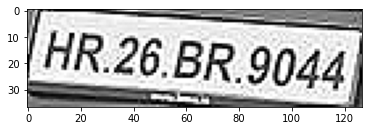

In [20]:
reader = easyocr.Reader(['en'])
plt.imshow(orr)
result = reader.readtext(orr)
result[0][-2]

## 5. Render Result

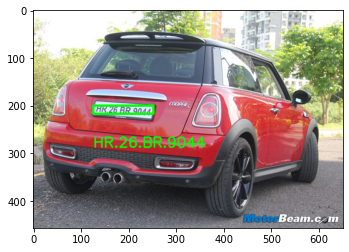

In [21]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))